<a href="https://colab.research.google.com/github/Chandra-data-ent/Chandra-data-ent/blob/main/Text_Analysis_Project_CULTURAL_CENTER_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : CHANDRA_SEKHAR_P


Subject : Text Analysis -



Dataset : https://catalog.data.gov/dataset/city-cultural-centers-audit-community-survey-open-response-data



In [ ]:
# Import the required packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from datetime import date
from google.colab import files
upload = files.upload()
data = pd.read_csv('City_Cultural_Centers_Response_Data.csv')

Saving City_Cultural_Centers_Response_Data.csv to City_Cultural_Centers_Response_Data.csv


In [ ]:
# Display the dataset
data

,Facility,Survey_Item,Response,Auditor_assigned_Category,Re-assigned_response,Translated,Original_Language
0,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,TJ Ownes should be compensated on the level of...,NaN,False,False,English
1,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,I would like to see more professional producti...,NaN,False,False,English
2,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,"The dance studio floor is consistently dirty, ...",Negative,False,False,English
3,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,This facility needs some TLC. It needs renovat...,Negative,False,False,English
4,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,The facility needs to be updated and a deep cl...,Negative,False,False,English
...,...,...,...,...,...,...,...
857,George Washington Carver Museum,Please let us know if you have any additional ...,The staff is always helpful and friendly.,Positive,False,False,English
858,George Washington Carver Museum,Please let us know if you have any additional ...,Under the prior Director the experience with s...,Positive,False,False,English
859,George Washington Carver Museum,Please let us know if you have any additional ...,"The staff, especially the new director is amaz...",Positive,False,False,English
860,George Washington Carver Museum,Please let us know if you have any additional ...,The staff and featured artist are always so we...,Positive,False,False,English


In [ ]:
# To know the number of columns and number of rows in the dataframe

data.shape

(862, 7)

In [ ]:
# Check for Nulls :

data.isnull().sum()

Facility                      0
Survey_Item                   0
Response                      0
Auditor_assigned_Category    73
Re-assigned_response          0
Translated                    1
Original_Language             0
dtype: int64

 **The data has Null values. It needs to be cleaned.**





In [ ]:
df = data[(data.Auditor_assigned_Category.notnull()) & (data.Translated.notnull()) ]
df

,Facility,Survey_Item,Response,Auditor_assigned_Category,Re-assigned_response,Translated,Original_Language
2,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,"The dance studio floor is consistently dirty, ...",Negative,False,False,English
3,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,This facility needs some TLC. It needs renovat...,Negative,False,False,English
4,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,The facility needs to be updated and a deep cl...,Negative,False,False,English
9,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,Current room size limits gatherings to small g...,Negative,False,False,English
10,African American Cultural and Heritage Facility,Please let us know if you have any additional ...,Hours to use the facility meeting space is lim...,Negative,False,False,English
...,...,...,...,...,...,...,...
857,George Washington Carver Museum,Please let us know if you have any additional ...,The staff is always helpful and friendly.,Positive,False,False,English
858,George Washington Carver Museum,Please let us know if you have any additional ...,Under the prior Director the experience with s...,Positive,False,False,English
859,George Washington Carver Museum,Please let us know if you have any additional ...,"The staff, especially the new director is amaz...",Positive,False,False,English
860,George Washington Carver Museum,Please let us know if you have any additional ...,The staff and featured artist are always so we...,Positive,False,False,English


**Remoed the entries with Null values from the 2 fields.**

**Now re-check for the Null values.**

In [ ]:
df.isnull().sum()

Facility                     0
Survey_Item                  0
Response                     0
Auditor_assigned_Category    0
Re-assigned_response         0
Translated                   0
Original_Language            0
dtype: int64

**There are no Null values.**

**Import the stop words for easier analysis.**

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)


{'did', 'or', 'were', 'her', 'couldn', 'ma', 'most', 'where', 'any', 'be', 'before', 'both', "should've", 'yours', 'how', 'was', 'out', 'i', 'some', 'own', 't', 'under', "wasn't", 'further', 'it', 'which', "didn't", 'below', 'while', 'during', 'we', 'your', "aren't", 'o', 'such', "it's", 'because', 'what', 'doing', "you've", 'who', 'only', 'should', 'weren', 'wasn', 'off', 'ourselves', 'all', "needn't", 'himself', 'him', "isn't", 'same', 'a', 'can', "she's", 'just', "won't", 'our', 'he', 'having', 'have', 'are', 'other', 'after', 'through', "mustn't", 'didn', 'ain', 'of', 'the', 'over', 'its', 'she', 'for', 'll', 'by', 'with', 'been', "wouldn't", 'between', "hadn't", 'wouldn', 'here', "doesn't", "couldn't", "mightn't", 'you', 'yourself', 'but', "haven't", 'and', "you're", 'myself', 'into', 'this', 'each', 'about', 'there', 'not', 'my', 'hasn', 'then', 'do', "you'd", 'very', 'on', 'at', 'why', 'd', 'shan', 'isn', 'does', 'so', 'down', 'to', 'mightn', 've', 'ours', 'few', "that'll", 'abo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# creating tokens

import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Response'].apply(prepare, pipeline=pipeline)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

**Create the word cloud and observe the most used words stated by reviewers/visitors where the management has to concentrate :**

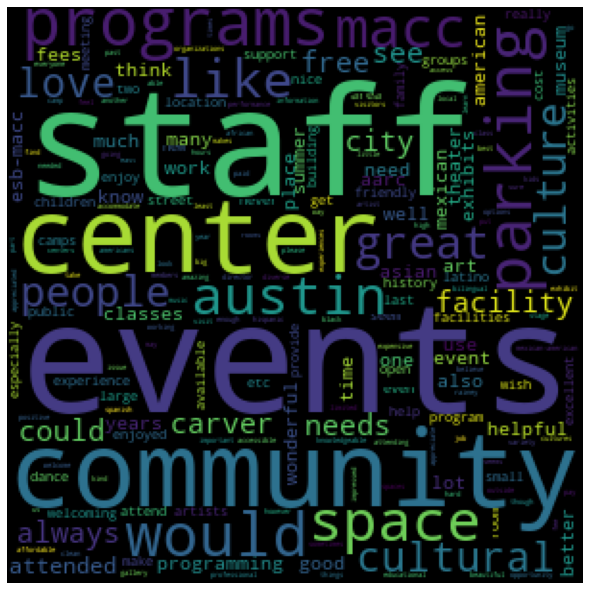

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='black', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
idf_df = compute_idf(df)
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=2):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df


**Display the word cloud generated by using the tfidf method :**

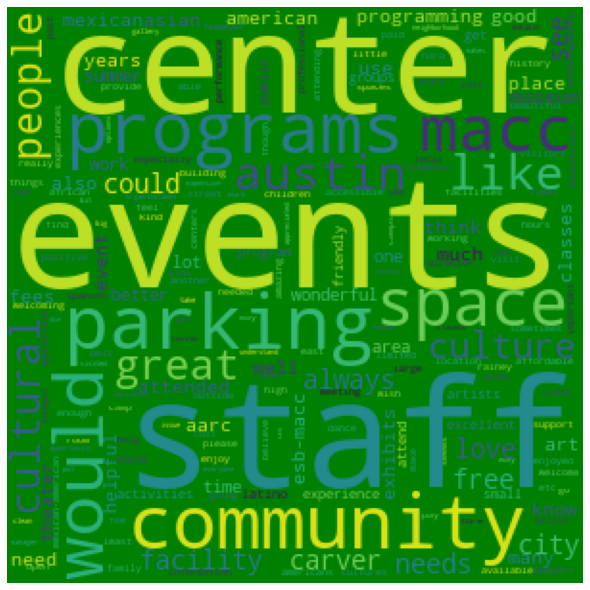

In [ ]:
wc = WordCloud(background_color='green', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [ ]:
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def count_keywords_by(df, by, keywords, column='tokens'):

    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)

    return freq_df.groupby(by=by).sum().sort_values(by)


Create Heatmap of the **Words Vs Facility :**


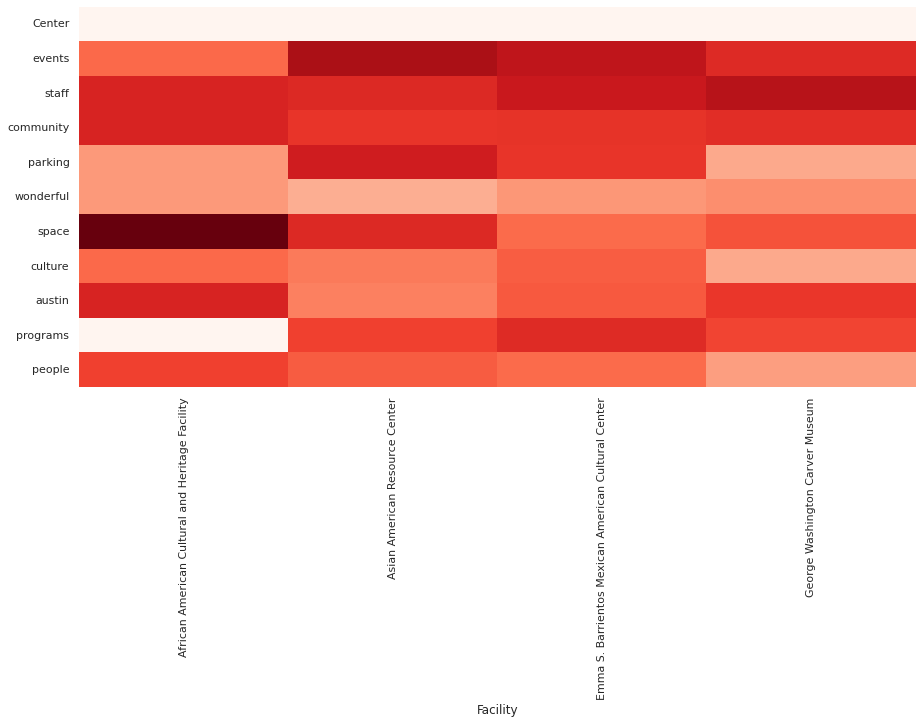

In [ ]:
import seaborn as sns
keywords = ['Center', 'events', 'staff', 'community',
            'parking', 'wonderful', 'space', 'culture', 'austin',
            'programs','people']
freq_df = count_keywords_by(df, by='Facility', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Facility')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)


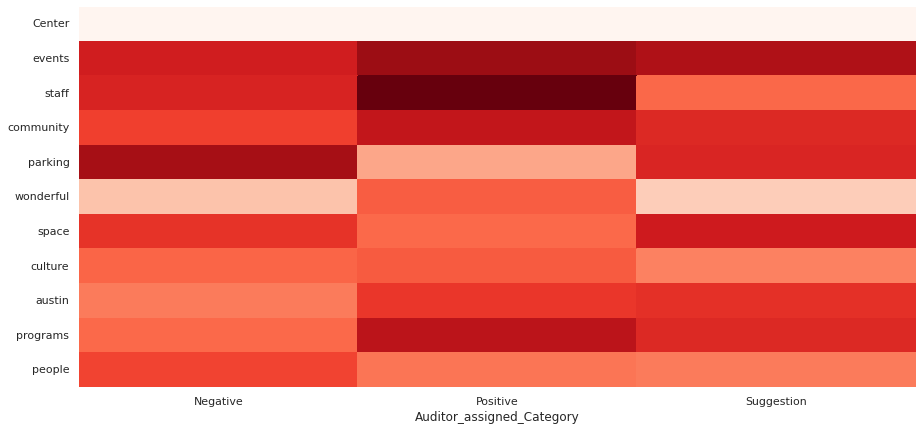

In [ ]:
import seaborn as sns
keywords = ['Center', 'events', 'staff', 'community',
            'parking', 'wonderful', 'space', 'culture', 'austin',
            'programs','people']
freq_df = count_keywords_by(df, by='Auditor_assigned_Category', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Auditor_assigned_Category')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
